In [31]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from collections import defaultdict

In [21]:
with open('./data/tags.json') as f:
    TAGS = json.load(f)

In [22]:
TAGS

{'1832F': ['binary search', 'dp'],
 '1832E': ['brute force', 'combinatorics', 'dp'],
 '1832D2': ['binary search', 'greedy', 'implementation', 'math'],
 '1832D1': ['binary search', 'greedy', 'implementation', 'math'],
 '1832C': ['greedy', 'implementation'],
 '1832B': ['brute force', 'sortings'],
 '1832A': ['strings'],
 '1829H': ['bitmasks', 'combinatorics', 'dp', 'math'],
 '1829G': ['data structures', 'dp', 'implementation', 'math'],
 '1829F': ['dfs and similar', 'graphs', 'math'],
 '1829E': ['dfs and similar', 'dsu', 'graphs', 'implementation'],
 '1829D': ['brute force', 'dfs and similar', 'dp', 'implementation'],
 '1829C': ['bitmasks', 'greedy', 'implementation'],
 '1829B': ['implementation'],
 '1829A': ['implementation', 'strings'],
 '1828B': ['math', 'number theory'],
 '1828A': ['constructive algorithms', 'math'],
 '1827F': ['constructive algorithms', 'data structures', 'greedy'],
 '1827E': ['constructive algorithms', 'dfs and similar', 'greedy', 'trees'],
 '1827D': ['data structure

In [12]:
DATA_PATH = './data/submissions/'
FILE_NAMEs = os.listdir(DATA_PATH)

In [24]:
nsolutions = defaultdict(int)

In [25]:
for fn in FILE_NAMEs:
    df = pd.read_csv(DATA_PATH + fn, encoding='utf-8', engine='c')
    for x in df['problem']:
        nsolutions[x] += 1

In [26]:
print(f'The dataset contains {len(FILE_NAMEs)} contests, {len(nsolutions)} problems and {sum(nsolutions.values())} solutions')

The dataset contains 649 contests, 3104 problems and 1622314 solutions


In [28]:
tags_len = defaultdict(int)
tags_count = defaultdict(int)
for x in nsolutions:
    tags_len[x] = len(TAGS[x])
    for y in TAGS[x]:
        tags_count[y] += 1

Text(0.5, 1.0, 'Number of Tags by Problem')

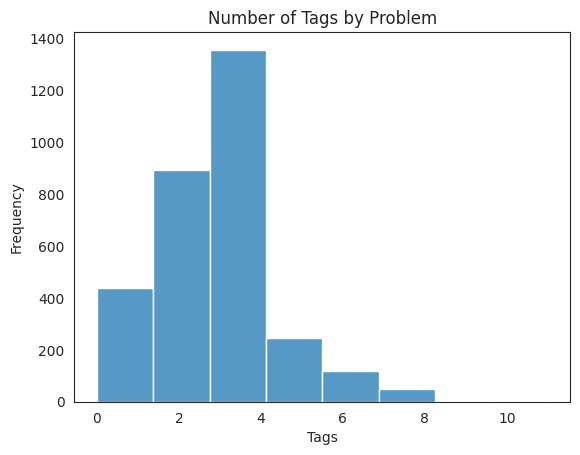

In [32]:
sns.histplot(list(tags_len.values()), bins=8)
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Number of Tags by Problem')

In [33]:
tags_count = dict(sorted(tags_count.items(), key=lambda x: -x[1]))

In [35]:
len(tags_count)

37

<AxesSubplot: title={'center': 'Number of Problems by Tag'}, xlabel='Problems'>

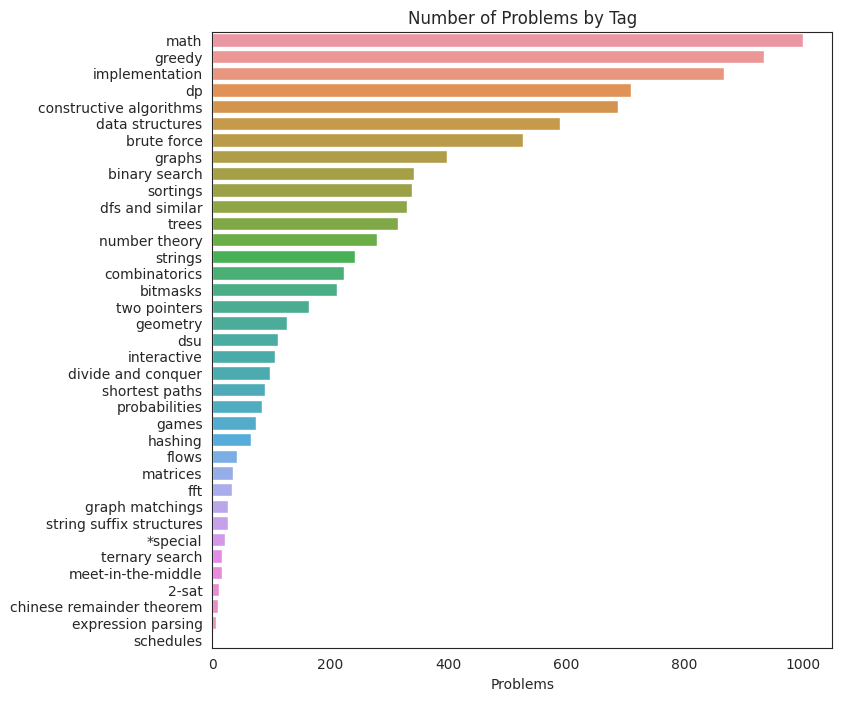

In [34]:
plt.figure(figsize=(8, 8))
plt.xlabel('Problems')
plt.title('Number of Problems by Tag')
sns.barplot(y=list(tags_count.keys()), x=list(tags_count.values()))